In [41]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [42]:
import warnings 
warnings.filterwarnings('ignore') 

In [43]:
# Read the CSV File

sales_data = pd.read_csv("sample_sales_data (1).csv")

In [44]:
# Top Five Rows

sales_data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [45]:
# Renaming the column

sales_data.rename(columns={"Unnamed: 0" : "CustomerID"}, inplace=True)

### Stastical Analysis

In [46]:
# Mean:
mean = sales_data.mean()
mean

CustomerID    3914.000000
unit_price       7.819480
quantity         2.501597
total           19.709905
dtype: float64

In [47]:
# 1. Variance: Measure of spread data from it's mean point.

sales_data.var()

CustomerID    5.108423e+06
unit_price    2.903150e+01
quantity      1.260505e+00
total         3.043866e+02
dtype: float64

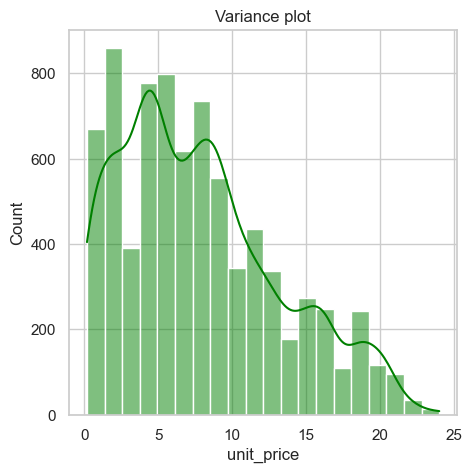

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
sns.histplot(data = sales_data, x = 'unit_price', bins = 20, kde = True, color = 'green')
plt.title("Variance plot")
plt.show()

Third Moment Business Decision

Skewness

In [49]:
# Skewness: It measures the asymmetry in the data

skewness = sales_data.skew()
skewness

CustomerID    0.000000
unit_price    0.648519
quantity     -0.004798
total         1.354308
dtype: float64

Data Cleaning

In [50]:
# Checking Null Values 

total_cell = len(sales_data)

Missingg_Value_count = sales_data.isnull().sum()

for col,values in Missingg_Value_count.items():
    print(col,":" ,  (values/total_cell)*100,'%')

CustomerID : 0.0 %
transaction_id : 0.0 %
timestamp : 0.0 %
product_id : 0.0 %
category : 0.0 %
customer_type : 0.0 %
unit_price : 0.0 %
quantity : 0.0 %
total : 0.0 %
payment_type : 0.0 %


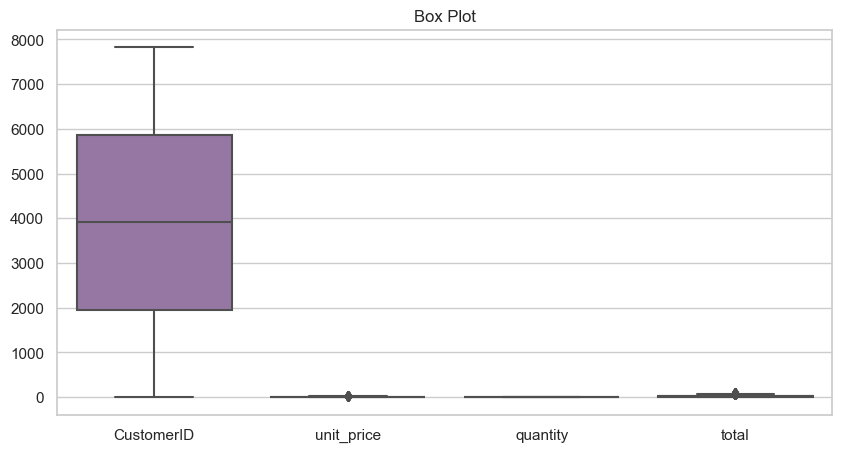

In [54]:
# Checking with Outlier 

plt.figure(figsize=(10, 5))
sns.boxplot(sales_data, palette="PRGn")
plt.title("Box Plot")
plt.show()

In [55]:
# Checking for Duplicates 

duplicates = sales_data.duplicated()
duplicates.sum()

0

EDA

In [58]:
sales_data.columns

Index(['CustomerID', 'transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [72]:
categories_colum = sales_data['category'].unique()
print(categories_colum)

['fruit' 'vegetables' 'refrigerated items' 'frozen' 'spices and herbs'
 'canned foods' 'packaged foods' 'condiments and sauces' 'beverages'
 'dairy' 'cheese' 'meat' 'seafood' 'baked goods' 'baking' 'snacks'
 'baby products' 'pets' 'personal care' 'medicine' 'kitchen'
 'cleaning products']


In [71]:
categories = sales_data['category'].value_counts().reset_index()
categories.columns = ['category','count']
categories
#print(categories)

,category,count
0,fruit,998
1,vegetables,846
2,packaged foods,507
3,baked goods,443
4,canned foods,431
5,refrigerated items,425
6,kitchen,382
7,meat,382
8,dairy,375
9,beverages,301


Size() functionis used to get the number elements in a particular group. It is used with groupby() opertion. 

In [94]:
categories_customer = sales_data.groupby(['customer_type','category']).size().reset_index(name='count')
categories_customer_Size = categories_customer.sort_values(['customer_type', 'count'], ascending=[True, False])
top_3 = categories_customer_Size.groupby('customer_type').head(5)
top_3

,customer_type,category,count
10,basic,fruit,186
21,basic,vegetables,160
14,basic,packaged foods,106
17,basic,refrigerated items,90
4,basic,canned foods,89
32,gold,fruit,197
43,gold,vegetables,174
36,gold,packaged foods,94
34,gold,meat,82
33,gold,kitchen,79


In [121]:
total_Sells = sales_data.groupby('category')['total'].sum().reset_index(name='total_amount')
total_sells_2 = total_Sells.sort_values(['total_amount'],ascending=[False])
total_sells_2

,category,total_amount
11,kitchen,14456.65
12,meat,14102.31
18,seafood,10754.81
13,medicine,10393.78
3,beverages,9930.64
6,cleaning products,9483.75
1,baked goods,8348.21
8,dairy,7551.60
17,refrigerated items,7436.45
5,cheese,6861.27
